<a href="https://colab.research.google.com/github/mordor-ai/deep_learning/blob/master/DEEP_LEARNING_TP5_CORRECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import random
import numpy as np
import matplotlib.pyplot as plt





In [0]:
print(tf.__version__)
!nvidia-smi
## permet de définir la version de la bibliotheque 
#import tensorflow.compat.v1 as tf

1.15.0
Thu Feb  6 16:14:49 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.48.02    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P0    26W /  70W |      0MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|

In [0]:
base = tf.keras.datasets.cifar100.load_data()
data_train = base[0][0]/255.0
data_test = base[1][0]/255.0

label_train = base[0][1]
label_test = base[1][1]

169009152/169001437 [==============================] - 14s 0us/step


In [0]:
def getTrainBatch(size):
  z = np.zeros((size, 32, 32, 3))
  l = np.zeros((size, 100))
  for i in range(0, size):
    r=random.randint(0, data_train.shape[0]-1)
    z[i] = data_train[r]
    l[i, label_train[r]]=1
  return z, l

def getTestBatch():
  size = data_test.shape[0]
  z = np.zeros((size, 32, 32, 3))
  l = np.zeros((size, 100))
  for i in range(0, size):
    #r=random.randint(0, data_test.shape[0]-1)
    z[i] = data_test[i]
    l[i, label_test[i]]=1
  return z, l


def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.01)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)


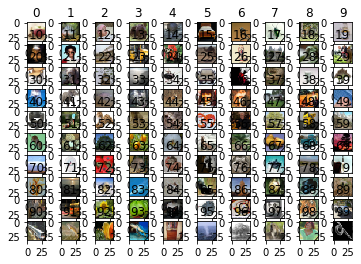

In [0]:
for i in range(0, 100):
  j = data_train[label_train[:, 0]==i][0]
  plt.subplot(10, 10, i+1)
  plt.imshow(j)
  plt.title(str(i))

plt.show()

In [0]:
def conv2d(in_, name, 
           kernel_size, 
           filters, 
           stride=1, 
           padding="SAME", activation="relu"):
  num_in_channels = in_.get_shape()[-1].value
  kernel_shape = [kernel_size, kernel_size, num_in_channels, filters]

  biases= tf.get_variable( name=name+"/bias",
                               shape=[filters],
                               trainable=True,
                               initializer=tf.constant_initializer(0.1))
  kernel = tf.get_variable(shape=kernel_shape, 
                           initializer=tf.contrib.layers.xavier_initializer(),
                           trainable=True, name=name+"/kernel")
                          
  outputs = tf.nn.conv2d(in_, kernel,
                             [1,stride, stride, 1],
                             padding=padding)
  outputs = tf.nn.bias_add(outputs, biases)
  if activation=="relu":
    return tf.nn.relu(outputs)
  elif activation=="rien":
    return outputs
  elif activation=="sigmoid":
    return tf.nn.sigmoid(outputs)
BATCH_SIZE=16






In [0]:
tf.reset_default_graph()

data   = tf.placeholder(tf.float32, shape=(None, 32, 32, 3))
label  = tf.placeholder(tf.float32, shape=(None, 100))
lr  = tf.placeholder(tf.float32, shape=())


In [0]:
N=4
c = conv2d(in_=data, 
       kernel_size=5,
       filters=96, stride=1,
       name="conv1")
print(c.shape)

c = conv2d(in_=c, 
       kernel_size=3,
       filters=128, stride=2,
       name="conv1b")

c = conv2d(in_=c, 
       kernel_size=3, stride=1,
       filters=128, 
       name="conv2")
#16
c = conv2d(in_=c, 
       kernel_size=3, stride=2,
       filters=256, 
       name="conv3")

c = conv2d(in_=c, 
       kernel_size=3, stride=2,
       filters=256, 
       name="conv4")

#4
c = conv2d(in_=c, 
       kernel_size=4 , padding='VALID',
       filters=N, 
       name="conv6")
code = c




#1
c = conv2d(in_=c, 
       kernel_size=1 , padding='SAME',
       filters=256, 
       name="conv7")

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

(?, 32, 32, 96)


In [0]:
c = tf.reshape(c, (-1, 8, 8, 4))

In [0]:
#8
c = tf.layers.conv2d_transpose(
              c,
              filters=96,
              kernel_size=[5, 5], strides=[2, 2], padding='SAME', name="deconv8"
          )

#32
c = tf.layers.conv2d_transpose(
              c,
              filters=64,
              kernel_size=[5,5], strides=[2, 2], padding='SAME', name="deconv9"
          )

c = conv2d(in_=c, 
       kernel_size=5,
       filters=3, padding='SAME',
       name="conv10", activation="rien")
out=c
#softmax_loss   = tf.reduce_mean(
#    tf.nn.softmax_cross_entropy_with_logits(labels=label, logits =out))



Instructions for updating:
Use `tf.keras.layers.Conv2DTranspose` instead.
Instructions for updating:
Please use `layer.__call__` method instead.


In [0]:
# fonction de perte à  optimiser
# c représente x
# data représente xchapeau
_loss = tf.reduce_mean((c-data)**2)

In [0]:
# on choisit l'optimiser 
optimizer = tf.compat.v1.train.MomentumOptimizer(0.01, 0.9)
#optimizer = tf.train.GradientDescentOptimizer(lr)
#on minimise la fonction de perte
train = optimizer.minimize(_loss)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
# demarre la session et initialise
sess = tf.Session()
init = tf.initialize_all_variables()
sess.run(init)

Instructions for updating:
Use `tf.global_variables_initializer` instead.


0    0.19981055


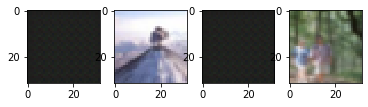

5000    0.06966953


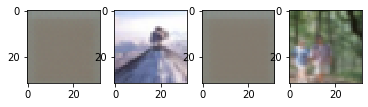

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


10000    0.04385603


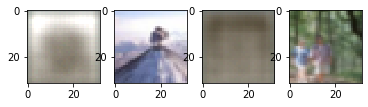

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


15000    0.03687022


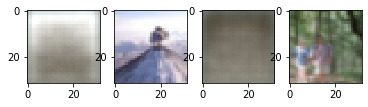

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


20000    0.036307525


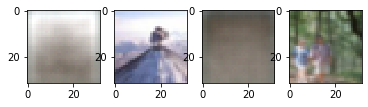

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


25000    0.035918072


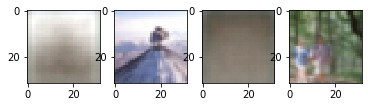

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


30000    0.035943467


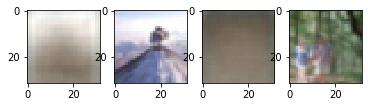

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


35000    0.035618506


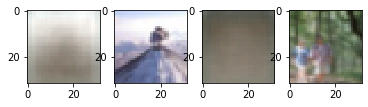

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


40000    0.035614263


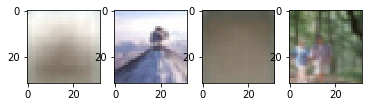

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


45000    0.035486568


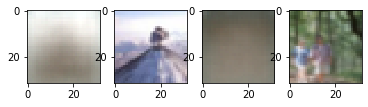

50000    0.03544385


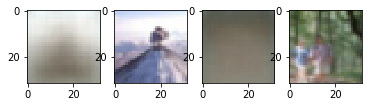

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


55000    0.03554416


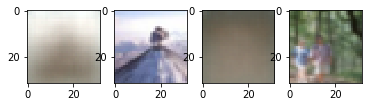

60000    0.03546683


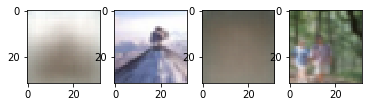

65000    0.03538787


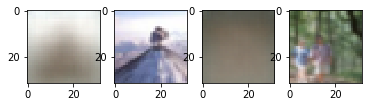

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


70000    0.035512723


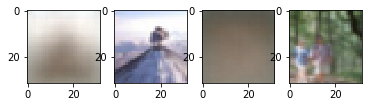

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


75000    0.035402127


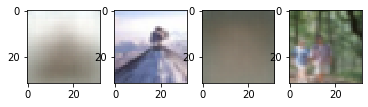

80000    0.035413954


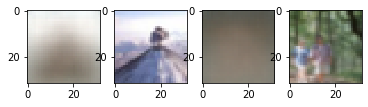

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


85000    0.03533762


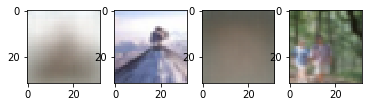

90000    0.035331156


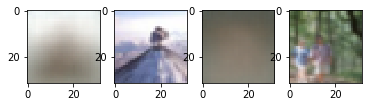

95000    0.035391066


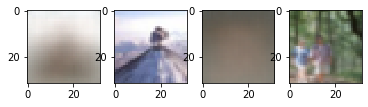

In [0]:
inf_test, inf_label_test = getTestBatch()
lr_=0.01
for i in range(0, 100000):
  z, l = getTrainBatch(size=BATCH_SIZE) #BATCH x 32x32 x3
  sess.run(   train, feed_dict={data:z, label:l, lr:lr_})
 
 
  if i%5000==0:
    z = inf_test[:500, :, :, :]
    lo, out_ = sess.run(  [_loss, out], feed_dict={data:z})
    
    print(i, "  ",lo)
    plt.subplot(1, 4, 1)
    plt.imshow(out_[0,:,:,:])
    plt.subplot(1, 4, 2)
    plt.imshow(z[0,:,:,:])
    plt.subplot(1, 4, 3)
    plt.imshow(out_[1,:,:,:])
    plt.subplot(1, 4, 4)
    plt.imshow(z[1,:,:,:])
    plt.show()
  if i%33333==0 and i>0:
    lr_*=0.1

In [0]:
# projection TSNE




